# # Analysis and Visualisation

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [67]:
import pandas as pd

# Use the full path to the CSV file
df = pd.read_csv(r'C:\Users\mmroh\Desktop\gopi\StudentsPerformance.csv')

df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [41]:
df.shape

(1000, 8)

In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [10]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

# # Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


# # Analysing Gender and Race

<AxesSubplot:xlabel='gender', ylabel='count'>

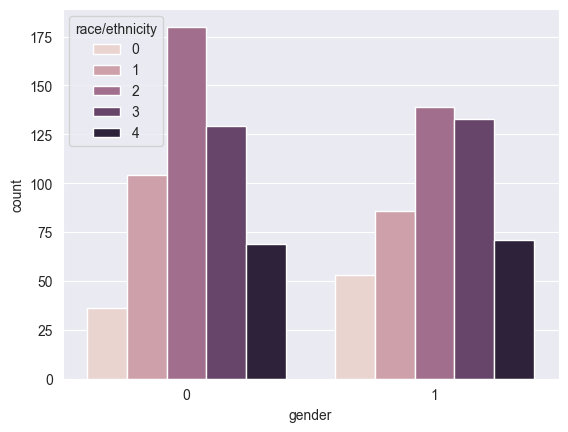

In [27]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and it has been defined earlier in your code.
# 0-female 1-male  To plot 'gender' on the x-axis and use 'race/ethnicity' as hue:
sns.countplot(x=df['gender'], hue=df['race/ethnicity'])

# Alternatively, to plot 'gender' on the y-axis and use 'race/ethnicity' as hue:
# sns.countplot(y=df['gender'], hue=df['race/ethnicity'])


There are more females in the class, (mostly from Group C)

# # Analysing Test Preparation Course

In [53]:
df['test preparation course'].value_counts()
# 1 - None
# 0 - Completed

test preparation course
none         642
completed    358
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21d4ec72af0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

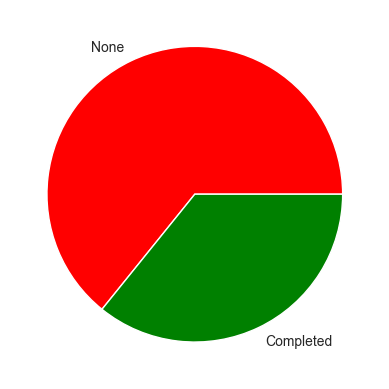

In [61]:
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

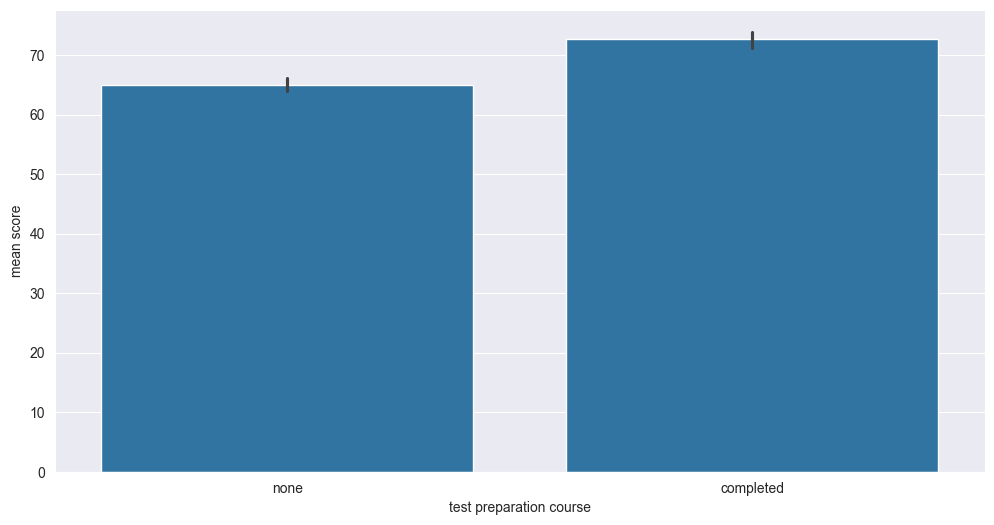

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'math score', 'reading score', and 'writing score' are the columns you want to average
# If you've already dropped these columns, you'll need to adjust the code accordingly
df['mean score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(x='test preparation course', y='mean score', data=df)

# Show the plot
plt.show()


The students who have completed Preparation Course are scoring good scores

# # Analysing Lunch 

C:\Users\mmroh\AppData\Local\Temp\ipykernel_14160\2699386646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')


<AxesSubplot:xlabel='lunch', ylabel='mean score'>

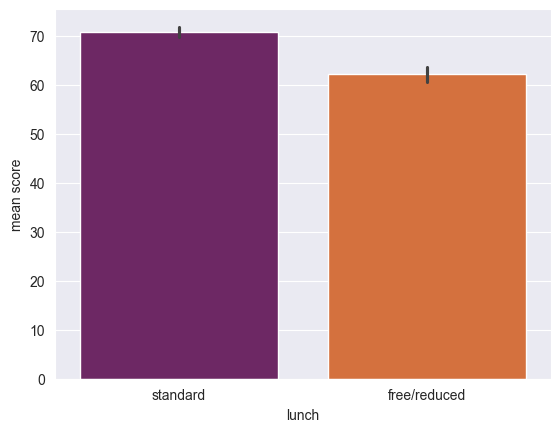

In [70]:
sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')

The students who get standard lunch are performing better in exams than the students with free/reduced lunch

# # Analysing parental level of education

<AxesSubplot:xlabel='parental level of education', ylabel='mean score'>

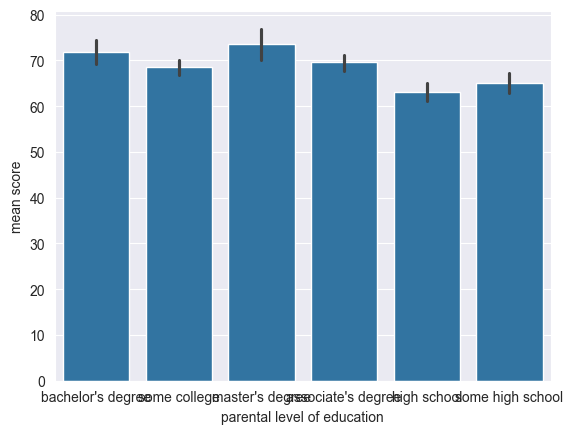

In [71]:
sns.barplot(x = 'parental level of education', y = 'mean score', data = df)

2nd Category of Parental Education belongs to High School and 3rd Category belongs to Master Degree therefore Parents Education is directly proportional to Students Marks

<Figure size 1200x600 with 0 Axes>

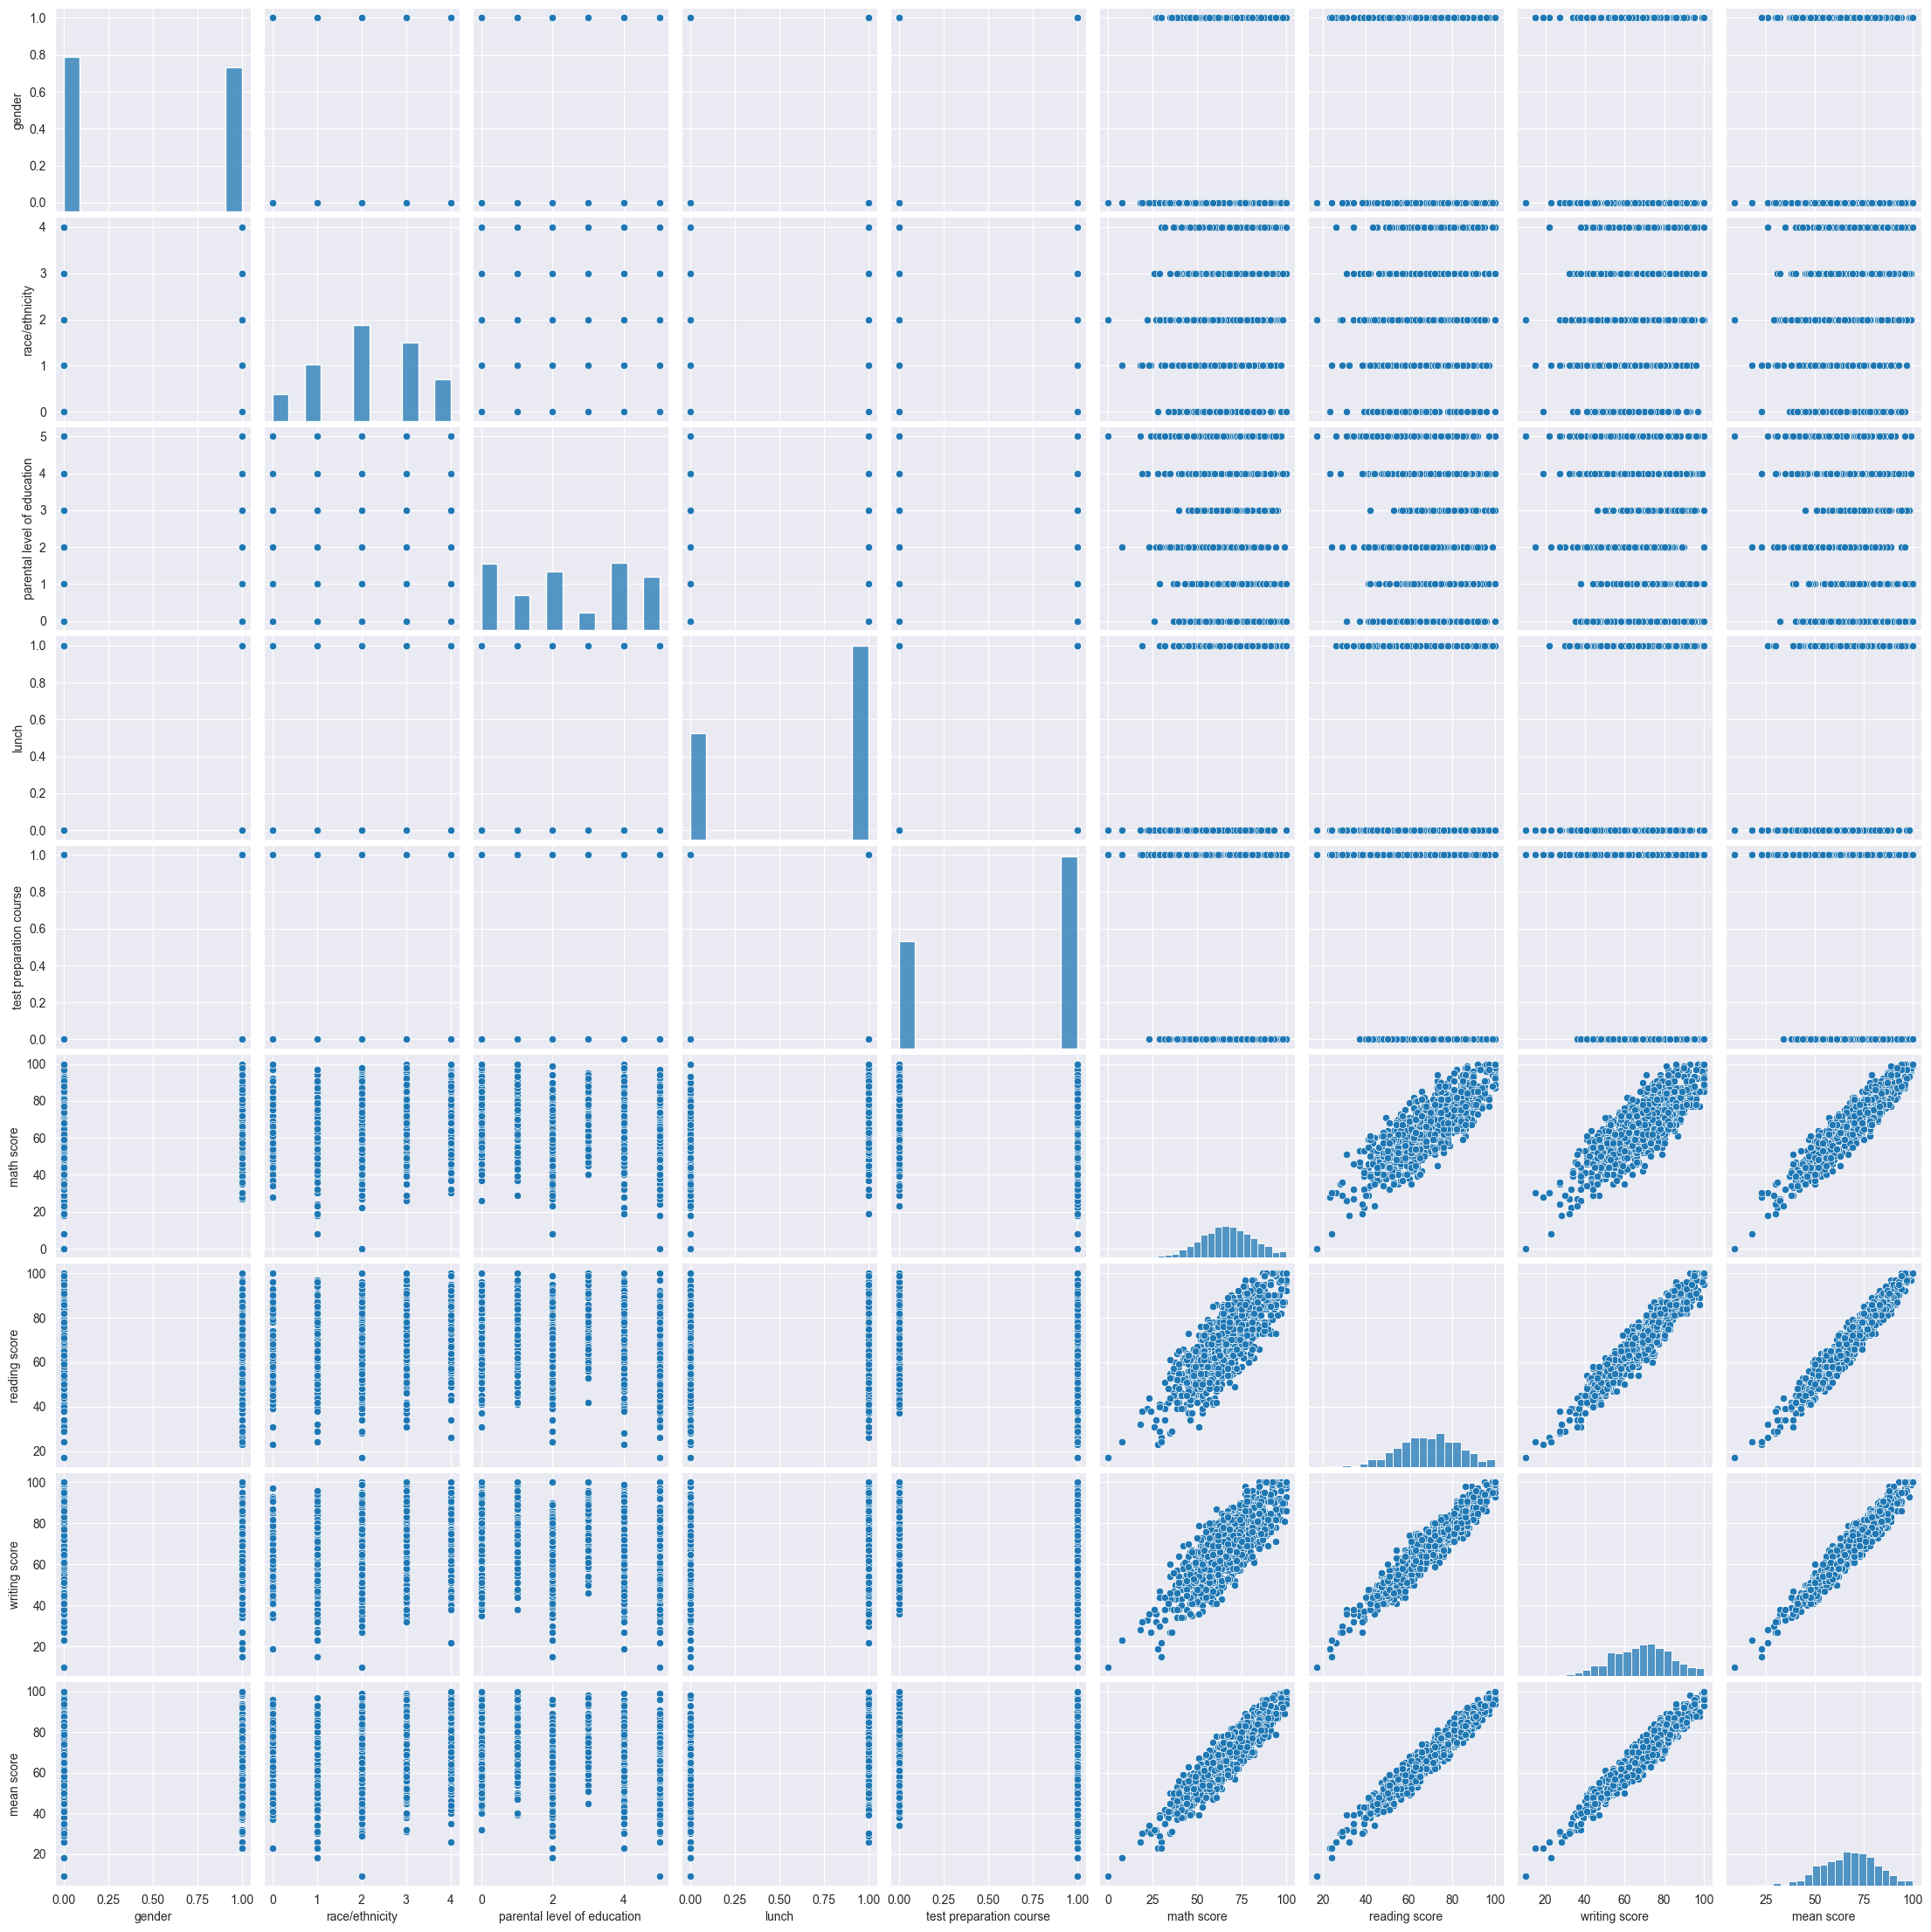

In [20]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()


ValueError: could not convert string to float: 'female'

<Figure size 1200x600 with 0 Axes>

# # Data Preprocessing

In [22]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [18]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# # Model Building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
model = LogisticRegression(solver='liblinear', random_state=0)